# 운동 동작 분류

3축 가속도계(accelerometer)와 3축 [자이로스코프(gyroscope)](https://ko.wikipedia.org/wiki/자이로스코프)를 활용해 측정된 센서 데이터에 머신러닝 알고리즘을 적용해 운동 동작 인식 알고리즘 개발.


In [30]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from matplotlib import rc
import warnings 
warnings.filterwarnings('ignore')

rc('font', family = 'NanumMyeongjo')
plt.rcParams['axes.unicode_minus'] =False

In [32]:
train = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')
test = pd.read_csv('test_features.csv')

In [6]:
train.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


In [7]:
train_labels.head()

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise


In [11]:
len(train_labels.label_desc.unique())

61

In [40]:
train_labels.label.nunique()

61

In [14]:
train_labels.label_desc.value_counts().sort_values(ascending = False)

Non-Exercise                                    1518
Device on Table                                   97
Plank                                             55
Wall Squat                                        48
Jump Rope                                         47
                                                ... 
Triceps Kickback (knee on bench) (right arm)      13
Arm Band Adjustment                               12
Dumbbell Row (knee on bench) (right arm)          12
Triceps Kickback (knee on bench) (left arm)       12
Dumbbell Row (knee on bench) (left arm)           12
Name: label_desc, Length: 61, dtype: int64

In [18]:
len(behavior.id.unique())

3125

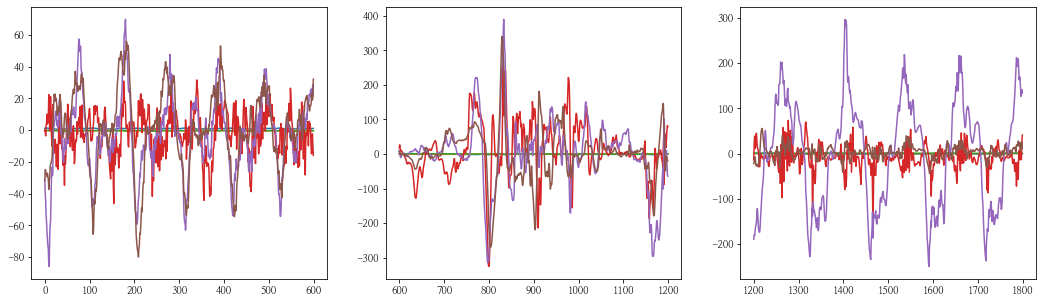

In [28]:
fig, axes = plt.subplots(1,3, figsize = (18,5))

for i, ax in enumerate(axes.flat):
    ex = train[train['id'] == i]
    ax.plot(ex.iloc[:,2:])

In [33]:
test.id.nunique()

782

In [34]:
submission = pd.read_csv('sample_submission.csv')

In [35]:
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3127,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
778,3903,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
779,3904,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
780,3905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [38]:
X = tf.reshape(np.array(train.iloc[:,2:]), [-1, 600, 6 ])
X.shape

TensorShape([3125, 600, 6])

In [42]:
y = tf.keras.utils.to_categorical(train_labels['label'])
y.shape

(3125, 61)

## DACON LSTM 베이스라인 응용

In [45]:
# 가벼운 모델 생성 
models = Sequential()
models.add(LSTM(64, input_shape = (600, 6), return_sequences = True))
models.add(Dropout(0.1))
models.add(LSTM(32))
models.add(Dense(128, activation ='relu'))
models.add(Dense(61, activation = 'softmax'))

models.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = models.fit(X, y ,epochs = 40, batch_size = 128, validation_split = 0.2)

Epoch 1/40
20/20 [==============================] - 28s 1s/step - loss: 3.6602 - accuracy: 0.3252 - val_loss: 2.7076 - val_accuracy: 0.4976
Epoch 2/40
20/20 [==============================] - 22s 1s/step - loss: 2.7272 - accuracy: 0.4843 - val_loss: 2.6723 - val_accuracy: 0.4976
Epoch 3/40
20/20 [==============================] - 23s 1s/step - loss: 2.5905 - accuracy: 0.4980 - val_loss: 2.5908 - val_accuracy: 0.4976
Epoch 4/40
20/20 [==============================] - 24s 1s/step - loss: 2.5956 - accuracy: 0.4727 - val_loss: 2.5207 - val_accuracy: 0.4976
Epoch 5/40
20/20 [==============================] - 23s 1s/step - loss: 2.5130 - accuracy: 0.4738 - val_loss: 2.4620 - val_accuracy: 0.5072
Epoch 6/40
20/20 [==============================] - 24s 1s/step - loss: 2.3718 - accuracy: 0.4999 - val_loss: 2.4132 - val_accuracy: 0.5136
Epoch 7/40
20/20 [==============================] - 24s 1s/step - loss: 2.3372 - accuracy: 0.4903 - val_loss: 2.3801 - val_accuracy: 0.5152
Epoch 8/40
20/20 [==

Text(0.5, 1.0, '정확도')

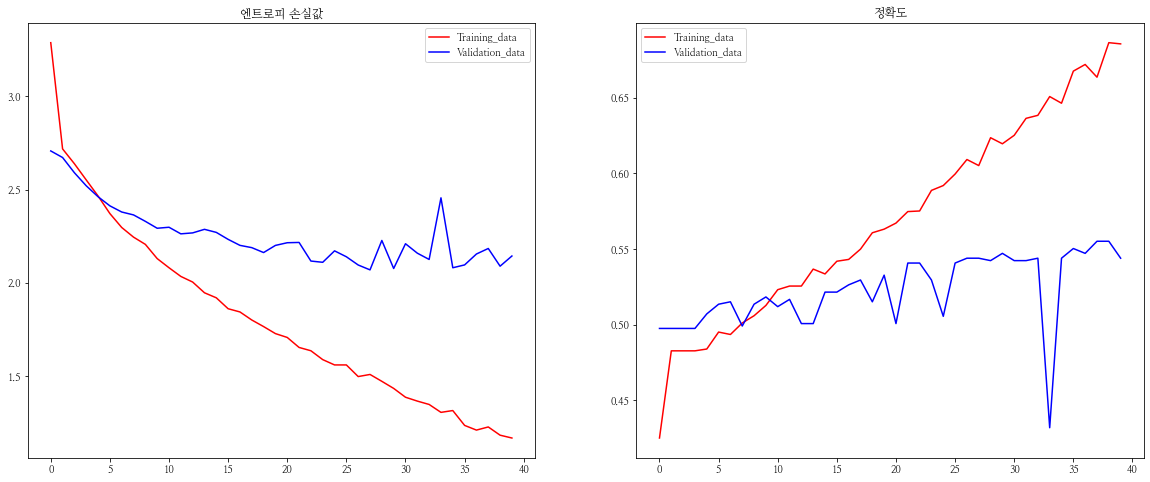

In [48]:
fig, axes = plt.subplots(1,2, figsize = (20,8))
axes[0].plot(history.history['loss'], color = 'red', label ='Training_data')
axes[0].plot(history.history['val_loss'], color = 'blue', label = 'Validation_data')
axes[0].legend()
axes[0].set_title('엔트로피 손실값')

axes[1].plot(history.history['accuracy'], color = 'red',label = 'Training_data')
axes[1].plot(history.history['val_accuracy'], color = 'blue', label = 'Validation_data')
axes[1].legend()
axes[1].set_title('정확도')

In [49]:
test_X = tf.reshape(np.array(test.iloc[:,2:]), [-1, 600, 6])
test_X.shape

TensorShape([782, 600, 6])

In [50]:
y_pred = models.predict(test_X)
submission.iloc[:,1:] = y_pred
submission

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,3125,0.005197,0.000502,2.951419e-05,3.361244e-05,0.000848,0.000167,0.000888,0.002720,2.173864e-02,0.056995,0.070554,0.014511,8.201376e-03,0.000147,0.059866,0.000449,0.000103,2.704326e-06,2.199139e-08,2.440952e-08,1.398951e-06,0.007483,0.000674,0.009569,0.014986,0.000031,0.220598,0.000120,1.861333e-04,1.535457e-04,0.004750,0.002095,0.021702,0.000427,0.000480,1.128491e-05,0.009933,0.002502,3.172307e-03,6.555202e-05,0.000016,9.976438e-06,0.000835,0.003082,0.003052,0.026411,0.000046,0.002580,0.147549,0.099109,0.065046,0.003597,3.985941e-02,2.425761e-06,0.001541,6.239768e-04,0.000048,0.000103,0.026148,0.000086,0.038363
1,3126,0.000599,0.003772,1.033710e-09,3.068160e-07,0.001483,0.000043,0.000067,0.005113,5.463163e-06,0.000111,0.000018,0.000786,7.813005e-07,0.001102,0.000043,0.000058,0.000169,7.958477e-07,1.171981e-07,8.261027e-11,3.633042e-07,0.000818,0.003844,0.002372,0.000427,0.000357,0.961045,0.000007,6.370765e-09,1.331694e-07,0.000111,0.000008,0.000386,0.001646,0.000122,2.278724e-07,0.000200,0.000243,2.409506e-07,1.557731e-09,0.000078,3.052083e-07,0.000017,0.000731,0.000018,0.001111,0.000008,0.000294,0.000207,0.002510,0.008833,0.000041,1.189178e-06,7.447284e-09,0.000015,1.608274e-07,0.000007,0.000457,0.000018,0.000540,0.000154
2,3127,0.008338,0.001033,1.785076e-04,1.472450e-05,0.000629,0.006604,0.002759,0.014532,9.211222e-03,0.058905,0.027304,0.010344,7.034760e-03,0.000060,0.035104,0.000326,0.000057,2.834042e-06,7.601588e-08,1.794524e-09,8.597777e-07,0.000082,0.001634,0.000251,0.017906,0.000042,0.067031,0.000126,3.994426e-04,1.039439e-01,0.005685,0.008754,0.004443,0.001429,0.000257,7.710211e-07,0.000189,0.010540,1.533981e-01,1.127056e-02,0.001614,3.865411e-05,0.029794,0.072379,0.042807,0.066115,0.000016,0.016324,0.056987,0.081422,0.002128,0.020776,8.937594e-03,3.052751e-05,0.000958,6.119601e-04,0.000132,0.000430,0.027712,0.000113,0.000854
3,3128,0.001538,0.000127,2.297239e-06,2.803996e-05,0.000227,0.000051,0.000005,0.001169,5.923580e-03,0.009144,0.002531,0.036350,4.947611e-04,0.002409,0.001551,0.000688,0.000031,5.163515e-07,2.071227e-08,3.128300e-10,3.253660e-07,0.002543,0.000503,0.016465,0.008618,0.000010,0.789625,0.000044,1.501785e-05,1.729386e-05,0.000149,0.000310,0.015465,0.000573,0.000225,5.490914e-06,0.007777,0.000130,3.394875e-05,1.112660e-06,0.000028,1.306885e-06,0.000028,0.000473,0.000077,0.008690,0.000001,0.000219,0.007084,0.016806,0.016162,0.020338,5.841827e-04,3.755892e-07,0.000406,2.785783e-04,0.000005,0.000640,0.003118,0.000014,0.020263
4,3129,0.000814,0.000486,4.367957e-06,2.977336e-06,0.000596,0.000130,0.000015,0.000173,5.295429e-06,0.003948,0.002269,0.009233,5.928954e-06,0.000041,0.000091,0.000218,0.000010,2.528312e-06,1.504711e-07,3.894892e-11,1.162974e-08,0.000065,0.001206,0.000538,0.002632,0.000012,0.943049,0.000002,6.163743e-08,6.256093e-06,0.011964,0.003869,0.000241,0.000895,0.000722,1.900868e-06,0.000157,0.000639,7.561845e-07,2.786035e-07,0.000057,1.158125e-06,0.000202,0.000167,0.000062,0.000277,0.000005,0.000864,0.002102,0.005793,0.003289,0.000964,9.079768e-06,2.533245e-08,0.000003,9.799479e-06,0.000001,0.000892,0.001170,0.000027,0.000057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,0.003859,0.008596,5.468713e-06,7.897450e-06,0.024997,0.000052,0.000135,0.001608,1.431028e-06,0.012477,0.007573,0.017658,6.869804e-06,0.000928,0.000544,0.001421,0.000460,9.885959e-05,1.062281e-05,3.428456e-10,6.619088e-08,0.000356,0.002561,0.005939,0.012460,0.000221,0.728826,0.000012,4.214309e-09,3.543072e-07,0.034822,0.022944,0.000341,0.012102,0.005668,9.853376e-06,0.001344,0.005631,6.142073e-07,1.487820e-08,0.000157,1.632209e-06,0.000088

In [51]:
submission.to_csv('submission파일/baseline_lstm.csv',index = False)

제출 결과값 : 2.06173

## DACON RandomForest 응용